In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
after_m_living = pd.read_excel("data/코로나이후_한달살기.xlsx")

In [3]:
after_m_living.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/utiful_sun92?Redirect=L...,2020.09.15.,[제주 한달살기_기록] ep1.19박20일 제주살이 조천리야 반가워!,"['#씨앤하우스', '#조천카페', '#틈', '#제주한달살기', '#제주도여행',...","['\n\n\n\n\u200b\n\n\n\n', '\n\n\n\n\u200b미래의 ..."
1,https://blog.naver.com/obh1680?Redirect=Log&lo...,2020.09.07.,오션뷰의 제주 한달살기 숙소,"['#제주한달살기숙소', '#탄탈루스']","['\n\n\n\n\u200b\n\n\n\n', '\n\n\n\n\u200b\n\n..."
2,https://blog.naver.com/misoagnes?Redirect=Log&...,2020.07.30.,"제주 한달 살기 차귀도 배낚시, 협재 해수욕장 모래놀이_4","['#제주도한달살기', '#제주한달살기', '#차귀도배낚시', '#수용횟집배낚시',...",['\n\n\n\n\u200b\u200b\u200b\u200b\u200b\u200b...
3,https://blog.naver.com/mouche007?Redirect=Log&...,2020.02.13.,코타키나발루 숙소 한달살기 가성비 추천,"['#코타키나발루숙소', '#코타키나발루한달살기', '#코타스윗']",['\n\n\n\n\u200b\u200b\u200b\u200b사원 모두가 블루와 그...
4,https://blog.naver.com/youriful?Redirect=Log&l...,2020.02.26.,발리한달살기 #21. 우붓 요가반 수업 후기,"['#발리한달살기', '#발리우붓요가', '#우붓요가반']",['\n\n\n\nDay 1620190628-0726 발리 한달살기 이야기 \n\n...


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
after_m_living = after_m_living.drop([776, 849])

In [5]:
after_m_living["hashtags"] = after_m_living["hashtags"].apply(ast.literal_eval)
after_m_living["contents"] = after_m_living["contents"].apply(ast.literal_eval)

In [6]:
after_m_living = after_m_living[(after_m_living["hashtags"].str.len() != 0) | (after_m_living["contents"].str.len() != 0)]

In [7]:
len(after_m_living)

1955

- hashtags랑 contents 데이터 합치기

In [8]:
after_m_living["info"] = after_m_living["hashtags"] + after_m_living["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사로 쪼개기

In [9]:
after_m_living["info"] = after_m_living["info"].map(lambda x: ' '.join(x))

In [10]:
after_m_living["info"] = after_m_living["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [11]:
okt = Okt()
after_m_living["info"] = after_m_living["info"].map(lambda x: okt.nouns(x))

In [12]:
after_m_living["info"]

0       [씨앤, 하우스, 카페, 틈, 제주, 한달살기, 제주도, 여행, 제주도, 미래, 나...
1       [제주, 한달살기, 숙소, 탄탈, 루스, 여행, 인, 플루, 혀니, 주, 제주도, ...
2       [제주도, 한달살기, 제주, 한달살기, 차귀도, 배, 낚시, 수용, 횟집, 배, 낚...
3       [코타키나발루, 숙소, 코타키나발루, 한달살기, 코타, 스윗, 사원, 모두, 블루,...
4       [발리, 한달살기, 붓, 요가, 붓, 요가, 반, 발리, 한달살기, 이야기, 발리,...
                              ...                        
1995    [바닷가, 바로, 앞, 블루, 하우스, 동상, 몽, 한달살기, 방역, 살충, 사회,...
1996    [제주도, 제주, 롯데, 호텔, 제주, 롯데, 호텔, 국내여행지, 추천, 국내, 여...
1997    [윤쿠잉, 제주, 라이프, 제주도, 한달살기, 윤쿠잉, 제주, 한달살기, 서쪽, 여...
1998    [남해, 날, 소풍, 남해, 한달살기, 남해, 보름, 살기, 남해, 일주일, 살기,...
1999    [강원도, 한달살기, 평창군, 참여자, 모집, 안내, 여러분, 평창군, 귀농, 귀촌...
Name: info, Length: 1955, dtype: object

# WordCloud

In [13]:
word_tokens = list(after_m_living["info"])
word_tokens = sum(word_tokens, [])

In [14]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [15]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

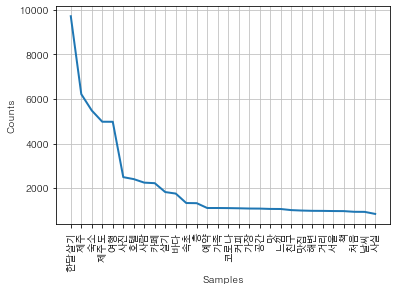

In [16]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

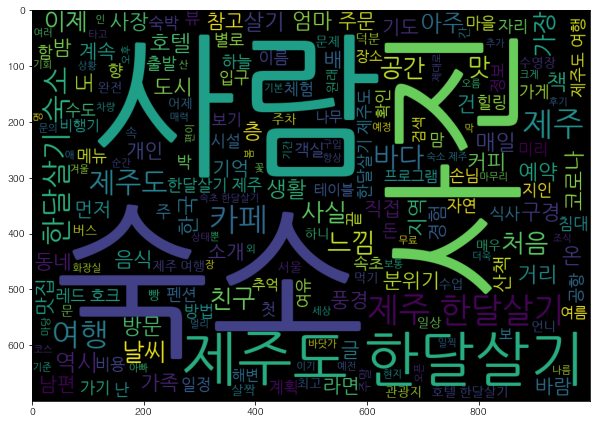

In [17]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('한달살기_코로나후.png')

# Word2vec

In [18]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = after_m_living["info"].apply(lambda x: korean_stop_words(x, stop_words))

In [19]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset, sg = 1, window = 10, min_count = 1)
model.init_sims(replace=True)

In [20]:
print("한달살기와 제주의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "제주")))

한달살기와 제주의 단어간 유사도는 0.60 입니다.


In [21]:
print("한달살기와 여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "여행")))

한달살기와 여행의 단어간 유사도는 0.67 입니다.


In [22]:
print("한달살기와 힐링의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "힐링")))

한달살기와 힐링의 단어간 유사도는 0.49 입니다.


In [23]:
print("한달살기와 힐링여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "힐링여행")))

한달살기와 힐링여행의 단어간 유사도는 0.64 입니다.


# LDA

In [26]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric

In [27]:
dictionary = corpora.Dictionary(dataset)
corpus = [dictionary.doc2bow(data) for data in dataset]

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [29]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 1;
    step = 5;
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

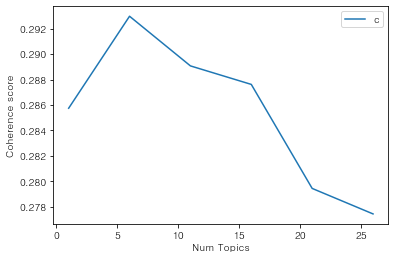

In [30]:
find_optimal_number_of_topics(dictionary, corpus, dataset)

In [31]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=6, passes=30)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.012*"한달살기" + 0.011*"사람" + 0.009*"치앙마이" + 0.008*"여행" + 0.007*"카페"')
(1, '0.027*"제주" + 0.023*"한달살기" + 0.013*"제주도" + 0.009*"순천" + 0.008*"맥주"')
(2, '0.031*"숙소" + 0.031*"한달살기" + 0.021*"제주" + 0.019*"제주도" + 0.017*"호텔"')
(3, '0.025*"속초" + 0.010*"한달살기" + 0.008*"발리" + 0.008*"사람" + 0.006*"사진"')
(4, '0.026*"한달살기" + 0.026*"여행" + 0.010*"살기" + 0.008*"책" + 0.007*"도시"')
(5, '0.023*"제주" + 0.017*"제주도" + 0.013*"한달살기" + 0.011*"카페" + 0.009*"사진"')


In [32]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (c_v): ', coherence_lda)

Coherence Score (c_v):  0.378898666088019


In [33]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)


Coherence Score (u_mass):  -1.930029591940694


In [34]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
                
    return(topic_table)

In [35]:
topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.4173,"[(2, 0.29725438), (3, 0.28360936), (5, 0.41726..."
1,1,2.0,0.9968,"[(2, 0.99681926)]"
2,2,1.0,0.7218,"[(1, 0.7218026), (5, 0.27617112)]"
3,3,2.0,0.7623,"[(0, 0.1807957), (2, 0.7622813), (4, 0.05553875)]"
4,4,0.0,0.6161,"[(0, 0.6161437), (2, 0.06829253), (3, 0.038032..."
...,...,...,...,...
1950,1950,2.0,0.5531,"[(2, 0.5530945), (3, 0.44114652)]"
1951,1951,2.0,0.9319,"[(1, 0.06456675), (2, 0.9318983)]"
1952,1952,5.0,0.5002,"[(3, 0.49640712), (5, 0.5001972)]"
1953,1953,2.0,0.7443,"[(1, 0.020534145), (2, 0.74432266), (5, 0.2289..."


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_viz)